In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression

# Dataset

In [2]:
age = {
    1:  "Under 18",
	18:  "18-24",
	25:  "25-34",
	35:  "35-44",
	45:  "45-49",
	50:  "50-55",
	56:  "56+"
}

In [2]:
occupation = {
	0:  "other",
	1:  "academic/educator",
	2:  "artist",
	3:  "clerical/admin",
	4:  "college/grad student",
	5:  "customer service",
	6:  "doctor/health care",
	7:  "executive/managerial",
	8:  "farmer",
	9:  "homemaker",
	10:  "K-12 student",
    11:  "lawyer",
	12:  "programmer",
	13:  "retired",
	14:  "sales/marketing",
	15:  "scientist",
	16:  "self-employed",
	17:  "technician/engineer",
	18:  "tradesman/craftsman",
	19:  "unemployed",
	20:  "writer"
}

In [4]:
genre = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
	    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
	    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [5]:
movies = pd.read_csv('./dataset/movies.csv').drop(columns=['Unnamed: 0'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
users = pd.read_csv('./dataset/users.csv').drop(columns=['Unnamed: 0'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [73]:
ratings = pd.read_csv('./dataset/ratings.csv').drop(columns=['Unnamed: 0'])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# EDA

In [8]:
print('There are {} movies'.format(len(movies.MovieID)))
print('There are {} users'.format(len(users.UserID)))

There are 3883 movies
There are 6040 users


Text(0, 0.5, 'No.USER (GENDER)')

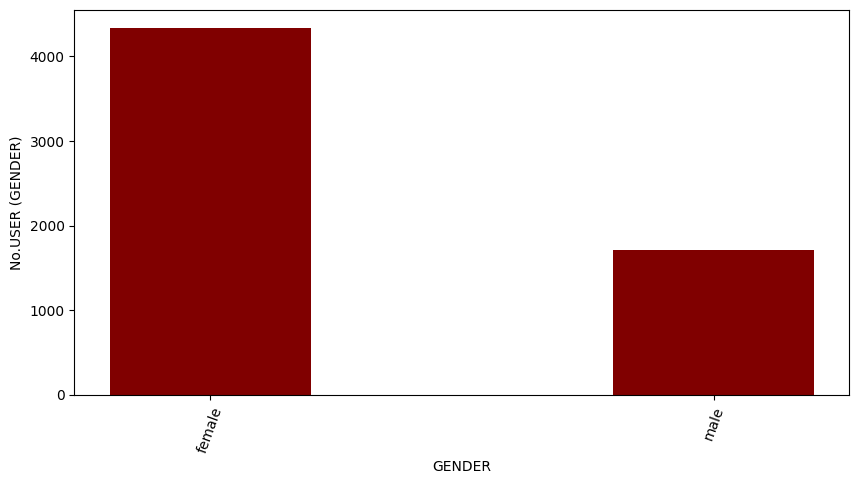

In [9]:
gender_counts = users.Gender.value_counts()
gender_dict = {
    'female': gender_counts[0],
    'male': gender_counts[1]
}

plt.figure(figsize = (10, 5))
plt.bar(gender_dict.keys(), gender_dict.values(), color ='maroon',
        width = 0.4)
plt.xlabel("GENDER")
plt.xticks(rotation=70)
plt.ylabel("No.USER (GENDER)")

Text(0, 0.5, 'No.RATING')

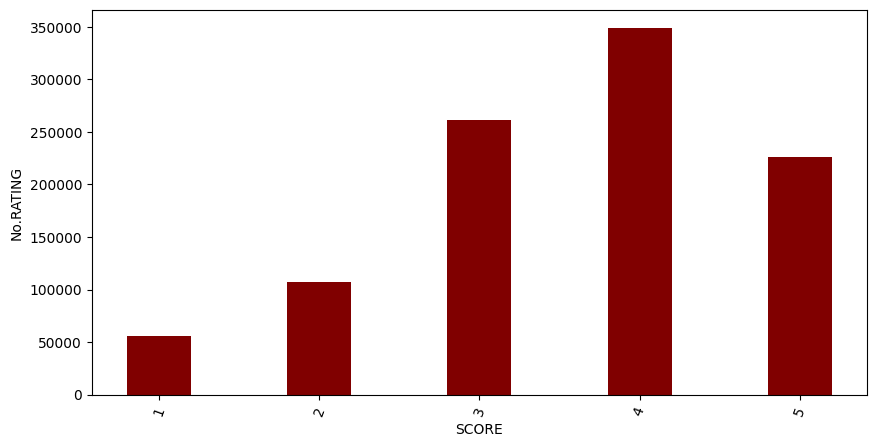

In [10]:
rating_counts = ratings.Rating.value_counts()
rating_dict = {
    1: rating_counts[1],
    2: rating_counts[2],
    3: rating_counts[3],
    4: rating_counts[4],
    5: rating_counts[5]
}

plt.figure(figsize = (10, 5))
plt.bar(rating_dict.keys(), rating_dict.values(), color ='maroon',
        width = 0.4)
plt.xlabel("SCORE")
plt.xticks(rotation=70)
plt.ylabel("No.RATING")

Text(0, 0.5, 'No.CLIENT')

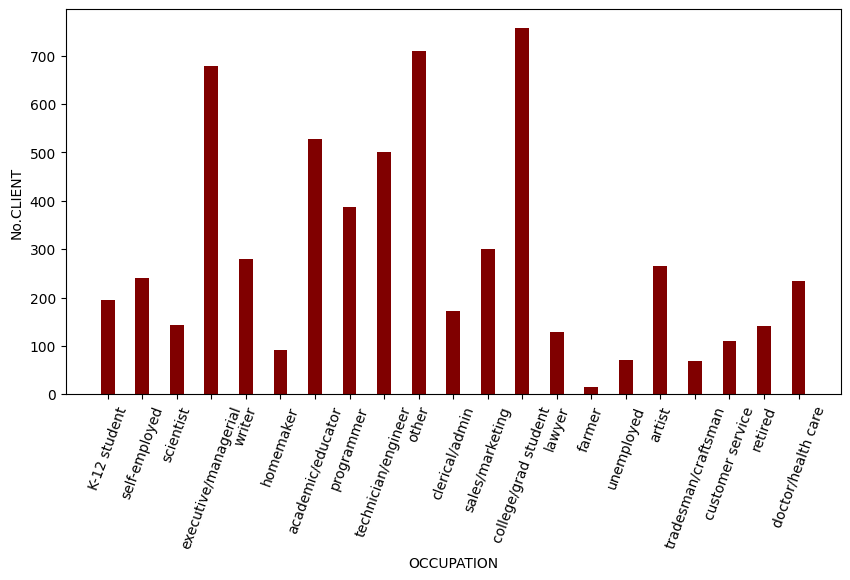

In [11]:
def count_occupation(column, dictionary):
    data_dict = {}
    for row in column:
        if dictionary[row] not in list(data_dict.keys()):
            data_dict[dictionary[row]] = 0
        else:
            data_dict[dictionary[row]] += 1
    return data_dict

occupation_dict = count_occupation(users.Occupation, occupation)

plt.figure(figsize = (10, 5))
plt.bar(occupation_dict.keys(), occupation_dict.values(), color ='maroon',
        width = 0.4)
plt.xlabel("OCCUPATION")
plt.xticks(rotation=70)
plt.ylabel("No.CLIENT")

# Training

## Content-based 

In [34]:
from sklearn.model_selection import train_test_split

class Dataset():
    def __init__(self, movies:pd.DataFrame, ratings:pd.DataFrame, users:pd.DataFrame, genre:list=genre):
        self.movies = movies
        self.ratings = ratings
        self.users = users
        self.genre = genre

        self.genre_index_by_name =  {name:i for i, name in enumerate(genre)}
        self.movie_index_by_id = {id: i for i, id in enumerate(movies["MovieID"])}
        
        self.movie_features = np.zeros((len(self.movies.MovieID), len(self.genre)))
    def one_hot_genre_film(self):
        for i, movie_genres in enumerate(movies["Genres"]):
            for genre in movie_genres.split("|"):        
                genre_index = self.genre_index_by_name[genre]
                self.movie_features[i, genre_index] = 1
        self.movie_features = pd.DataFrame(data=self.movie_features, columns=self.genre)
        self.movie_features.insert(loc=0, column='MovieID', value=self.movies.MovieID)
        return self.movie_features
    
    def call(self):
        observation = 
        

In [70]:
dataset = Dataset(movies, ratings, users, genre)
movie_one_hot = dataset.one_hot_genre_film()

In [71]:
df = pd.DataFrame(data=movie_one_hot, columns=genre)
df.insert(loc=0, column='MovieID', value=movies.MovieID)
df.head()

,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# Chọn tất cả các phim liên quan đến user đó
id = 1
user_id_movie = ratings[ratings.UserID == id].MovieID
movie_genres = df.loc[set(df.MovieID.values) & set(user_id_movie.values)]
movie_genres = movie_genres.drop(['MovieID'], axis=1)
movie_ratings = ratings[ratings.UserID == id].Rating

model = LinearRegression().fit(movie_genres, movie_ratings)

model.predict(np.random.randint(1, 5, (1, 18)))

C:\Users\ABC\AppData\Local\Temp\ipykernel_22020\37901204.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  movie_genres = df.loc[set(df.MovieID.values) & set(user_id_movie.values)]
c:\Users\ABC\anaconda3\envs\microservice\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.67826144])

## Collaborative Filltering

# Evaluation